In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/joncrall/.local/conda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['split']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Create a Empty AnnotInference Graph

In [2]:
from graphid.core import AnnotInference
infr = AnnotInference()
print('infr = {}'.format(infr))

infr = <AnnotInference(nNodes=0, nEdges=0, nCCs=0)>


## Add 5 annotations / nodes 

infr = <AnnotInference(nNodes=5, nEdges=0, nCCs=5)>


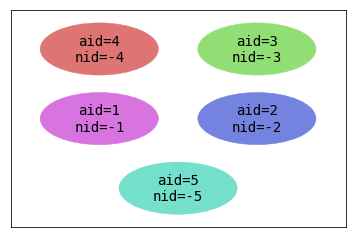

In [3]:
infr.add_aids(list(range(1, 6)))
print('infr = {}'.format(infr))
infr.show_graph()

## Add a few decisions / edges between the nodes

infr = <AnnotInference(nNodes=5, nEdges=3, nCCs=4)>


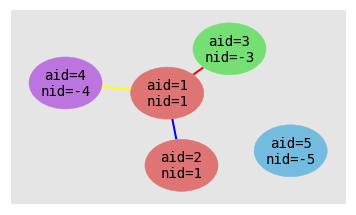

In [4]:
from graphid.core.state import POSTV, NEGTV, INCMP, UNREV, UNKWN

infr.add_feedback((1, 2), POSTV)  # Positive  (I can visually tell these are the same)
infr.add_feedback((1, 3), NEGTV)  # Negative (I can visually tell these are not the same)
infr.add_feedback((1, 4), INCMP)  # Incomparable (no visual evidence of difference or sameness)
print('infr = {}'.format(infr))
infr.show_graph()

infr = <AnnotInference(nNodes=5, nEdges=5, nCCs=2)>


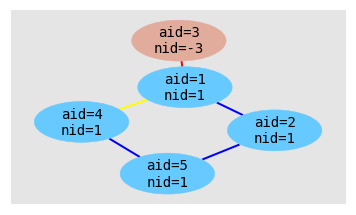

In [5]:
# Add a few more positive decisions
infr.add_feedback((2, 5), POSTV)
infr.add_feedback((4, 5), POSTV)
print('infr = {}'.format(infr))
infr.show_graph()

## The next review adds in an inconsistency
(Note that there is a highlight around the edge the algorithm has determined to be most likely to be wrongly reviewed) 

infr = <AnnotInference(nNodes=5, nEdges=6, nCCs=2)>
status = {
    'nNodes': 5,
    'nEdges': 6,
    'nCCs': 2,
    'nPostvEdges': 3,
    'nNegtvEdges': 2,
    'nIncmpEdges': 1,
    'nUnrevEdges': 0,
    'nPosRedunCCs': 0,
    'nNegRedunPairs': 0,
    'nInconsistentCCs': 1,
}


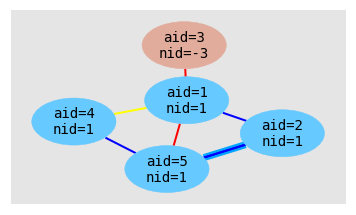

In [6]:
infr.add_feedback((1, 5), NEGTV)
print('infr = {}'.format(infr))
# The `infr.status` method is a useful tool for breaking down the 
# current state of the graph. See the docstring for `infr.status` for 
# more information on each item. 
print('status = {}'.format(ub.repr2(infr.status(), nl=1)))
infr.show_graph()

In [7]:
# Whenever an inconsistent edge is added, a potential fix is prioritized. 
# Peeking at the top of the priority queue shows the highlighted edge.
infr.peek()

((2, 5), 10.000000001)

## Re-reviewing this edge restores consistency

infr = <AnnotInference(nNodes=5, nEdges=6, nCCs=3)>
status = {
    'nNodes': 5,
    'nEdges': 6,
    'nCCs': 3,
    'nPostvEdges': 2,
    'nNegtvEdges': 3,
    'nIncmpEdges': 1,
    'nUnrevEdges': 0,
    'nPosRedunCCs': 2,
    'nNegRedunPairs': 1,
    'nInconsistentCCs': 0,
}


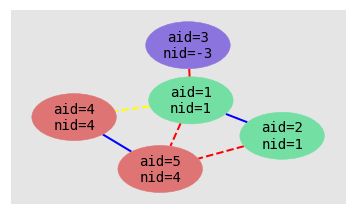

In [8]:
infr.add_feedback((2, 5), NEGTV)
print('infr = {}'.format(infr))
print('status = {}'.format(ub.repr2(infr.status(), nl=1)))
infr.show_graph()

## By default the queue is empty
Run `infr.prioritize` to populate it. You will get better results if you have hooked up good ranking and verification algorithms.

<PriorityQueue(size=0)>
<PriorityQueue(size=0)>


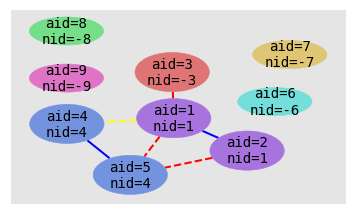

In [9]:
infr.add_aids([6, 7, 8, 9])
print(infr.queue)
infr.prioritize()
print(infr.queue)
infr.show_graph()

In [15]:
# We need to add a few candidate edges
candidates = list(infr.find_neg_redun_candidate_edges())
infr.add_candidate_edges(candidates)
print(infr.queue)
infr.peek_many(n=10)

<PriorityQueue(size=29)>


[((1, 6), 9.9999999999999995e-07),
 ((1, 7), 9.9999999999999995e-07),
 ((1, 8), 9.9999999999999995e-07),
 ((1, 9), 9.9999999999999995e-07),
 ((2, 3), 9.9999999999999995e-07),
 ((2, 6), 9.9999999999999995e-07),
 ((2, 7), 9.9999999999999995e-07),
 ((2, 8), 9.9999999999999995e-07),
 ((2, 9), 9.9999999999999995e-07),
 ((3, 4), 9.9999999999999995e-07)]

<PriorityQueue(size=29) at 0x7f44232d94e0>